# Stock Price Prediction Using Machine Learning Algorithms
Predicting the future direction of stock prices is a difficult task. The prices depends on many factors like the market's opinion about a stock, latest announcements, etc. We will use machine learning to use this information and try to predict the stock prices.<br>
The methods used are:-
1. Moving Average
2. Linear Regression
3. K-Nearest Neighbors
4. Auto Arima
5. Long short term memory

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Closing price is the weighted average price of the last 30 mins of trading, whereas 'Last' is the last traded price of the stock on that day.<br>
1. Total Trade Quantity is the number of shares bought or sold in the day.
2. Turnover is the turnover of the particular company.

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

In [4]:
df.index = df['Date']

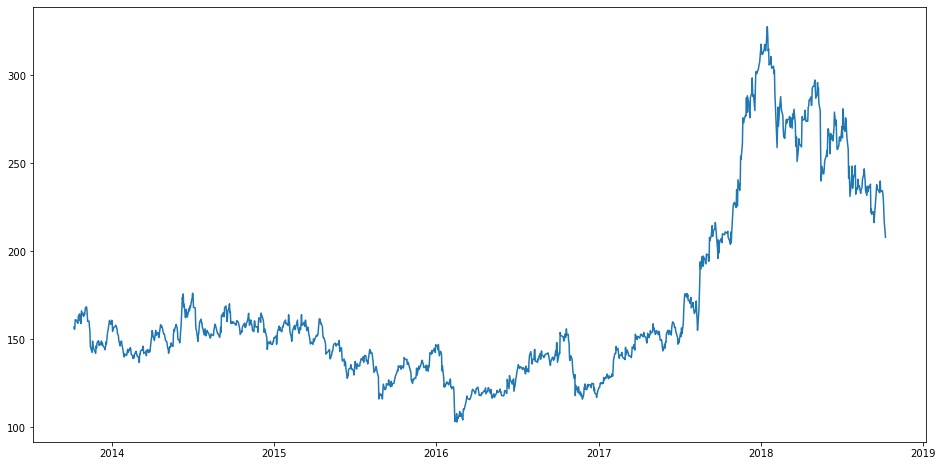

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df['Open'],label='Opening prices')

# Technical Indicators

In [6]:
def technical_indicators(dataset):
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

# Moving Average

In [7]:
data = df.sort_index(ascending=True,axis=0)

In [8]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [9]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Open'])

In [10]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Open'][i] = data['Open'][i]

In [11]:
train = new_data[:987].copy()
valid = new_data[987:].copy()

In [12]:
train.shape

(987, 2)

In [13]:
valid.shape

(248, 2)

In [14]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Open'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [15]:
rms = np.sqrt(np.mean(np.power((np.array(valid['Open'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
104.54621082875627


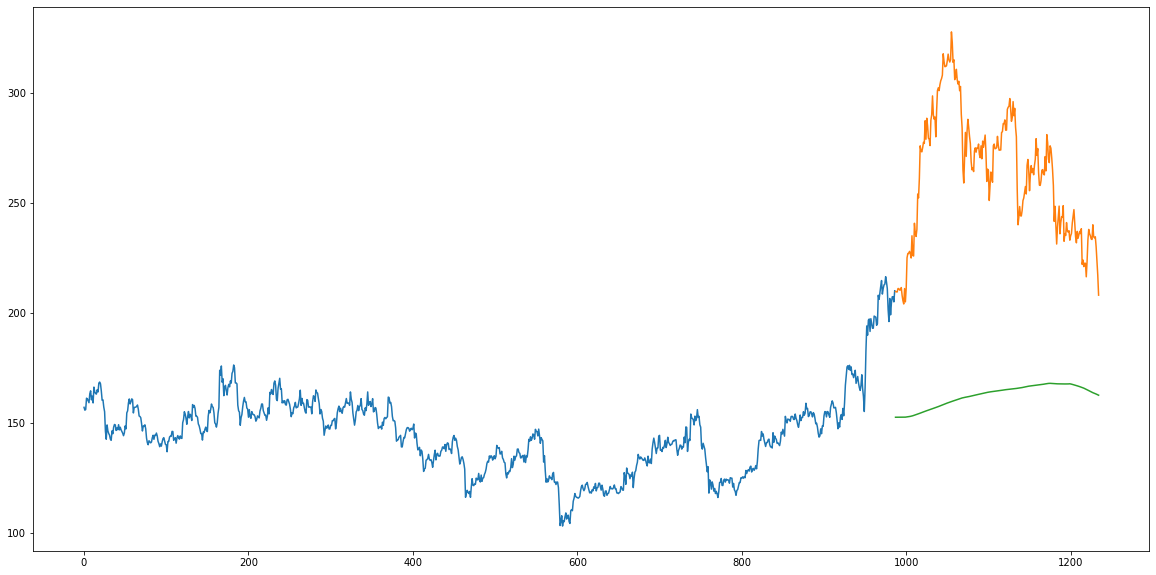

In [16]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Open'],label='Train')
plt.plot(valid[['Open','Predictions']],label='Valid')

# Linear Regression

In [17]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [18]:
data = df.sort_index(ascending=True, axis=0)

In [19]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [20]:
technical_indicators(data)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),26ema,12ema,MACD
Date,,,,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,155.800000,155.800000,0.000000
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,155.670192,155.664583,-0.005609
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,157.279744,157.415242,0.135499
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,158.054186,158.246932,0.192746
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09,158.377881,158.573802,0.195920


In [21]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open', 'High','Low','Last','Close','26ema','12ema','MACD'])

In [22]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['High'][i] = data['High'][i]
    new_data['Low'][i] = data['Low'][i]
    new_data['Last'][i] = data['Last'][i]
    new_data['Close'][i] = data['Close'][i]
    new_data['26ema'][i] = data['26ema'][i]
    new_data['12ema'][i] = data['12ema'][i]
    new_data['MACD'][i] = data['MACD'][i]
    new_data['Open'][i] = data['Open'][i]

In [23]:
new_data.head()

,Date,Open,High,Low,Last,Close,26ema,12ema,MACD
0,2013-10-08 00:00:00,157.0,157.8,155.2,155.8,155.8,155.8,155.8,0.0
1,2013-10-09 00:00:00,155.7,158.2,154.15,155.3,155.55,155.670192,155.664583,-0.005609
2,2013-10-10 00:00:00,156.0,160.8,155.85,160.3,160.15,157.279744,157.415242,0.135499
3,2013-10-11 00:00:00,161.15,163.45,159.0,159.8,160.05,158.054186,158.246932,0.192746
4,2013-10-14 00:00:00,160.85,161.45,157.7,159.3,159.45,158.377881,158.573802,0.19592


In [24]:
new_data.index = new_data['Date']

In [25]:
new_data.drop('Date',axis=1,inplace=True)

In [26]:
train = new_data[:987].copy()
valid = new_data[987:].copy()

In [27]:
x_train = train.drop('Open', axis=1)
y_train = train['Open']
x_valid = valid.drop('Open', axis=1)
y_valid = valid['Open']

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
preds = model.predict(x_valid)
rms = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

2.496067624784661

In [30]:
valid['Predictions'] = 0
valid['Predictions'] = preds

In [31]:
valid.index = new_data[987:].index
train.index = new_data[:987].index

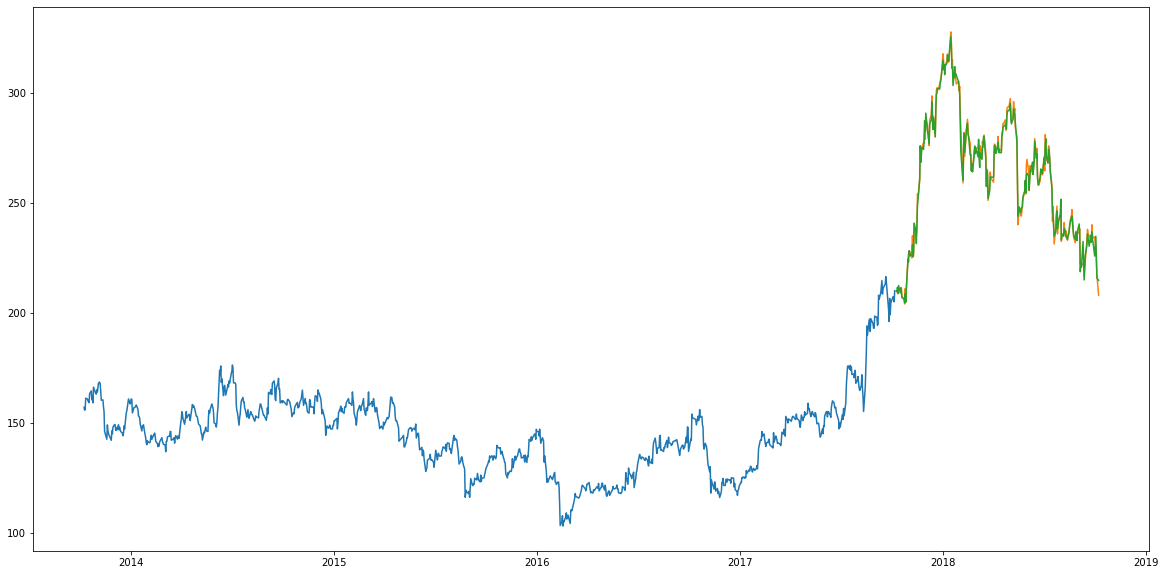

In [32]:
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])

# K-Nearest Neighbors

In [33]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [34]:
train = new_data[:987].copy()
valid = new_data[987:].copy()

In [35]:
x_train = train.drop('Open', axis=1)
y_train = train['Open']
x_valid = valid.drop('Open', axis=1)
y_valid = valid['Open']

In [36]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [37]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [38]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [39]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

59.30410928765576

In [40]:
valid['Predictions'] = 0
valid['Predictions'] = preds

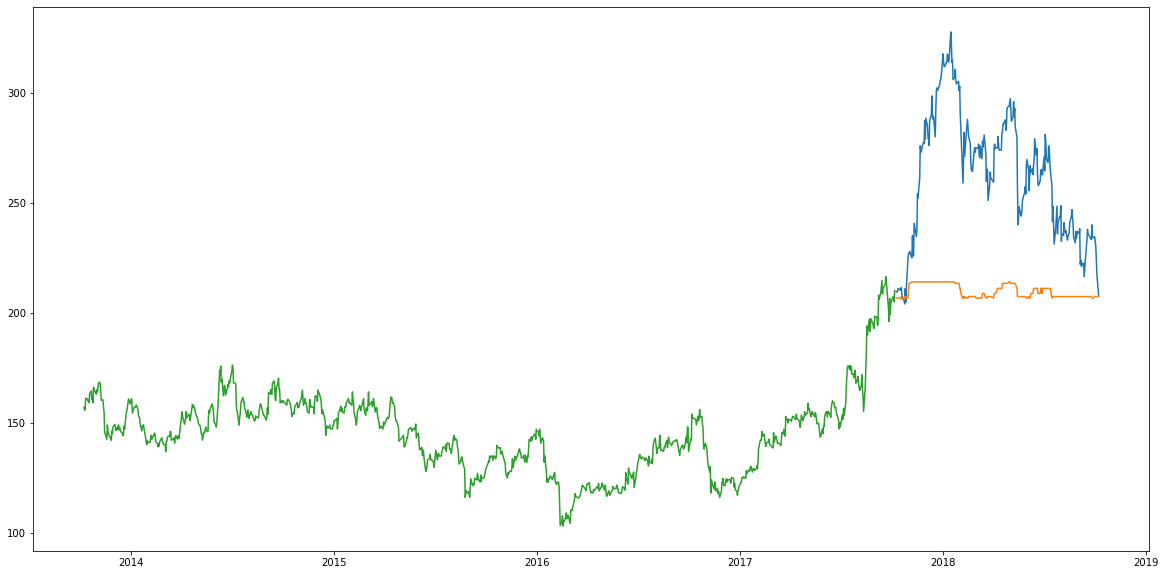

In [41]:
plt.plot(valid[['Open', 'Predictions']])
plt.plot(train['Open'])

# ARIMA


In [42]:
from pmdarima import auto_arima

In [43]:
data = df.sort_index(ascending=True, axis=0)

In [44]:
train = data[:987].copy()
valid = data[987:].copy()

In [45]:
training = train['Open']
validation = valid['Open']

In [46]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5570.173, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5291.243, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5569.560, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5192.227, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5193.257, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5193.545, Time=0.54 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5194.004, Time=0.85 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5192.400, Time=0.46 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=4.91 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=5194.196, Time=2.10 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [47]:
forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [48]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Open'])-np.array(forecast['Prediction'])),2)))
rms

79.04794950367716

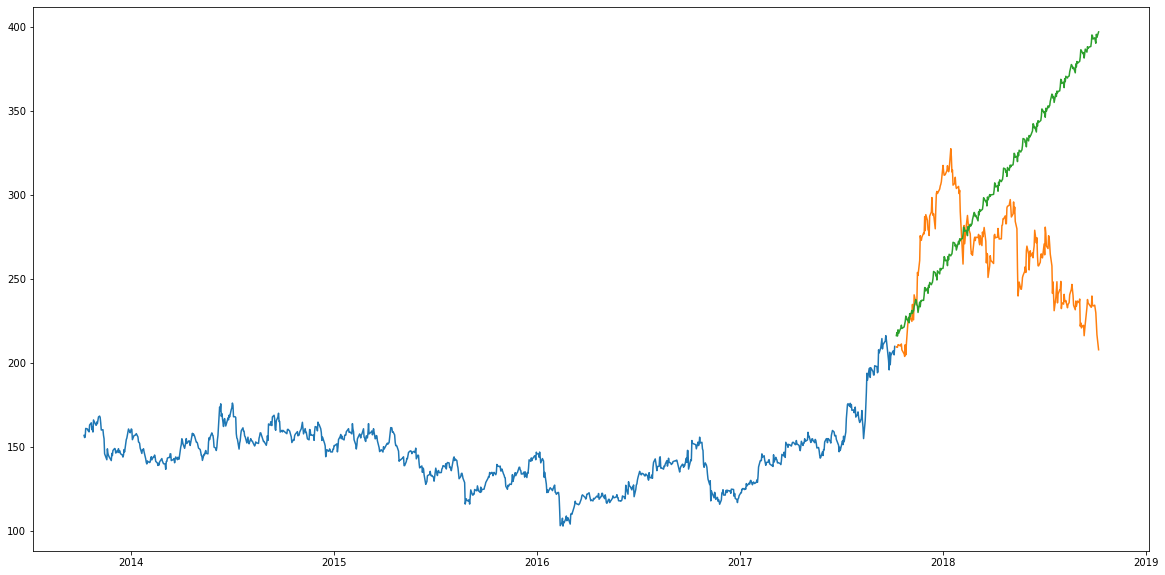

In [49]:
plt.plot(train['Open'])
plt.plot(valid['Open'])
plt.plot(forecast['Prediction'])

# LSTM

In [50]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [51]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Open'][i] = data['Open'][i]

In [52]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [53]:
new_data.head()

,Open
Date,
2013-10-08,157.0
2013-10-09,155.7
2013-10-10,156.0
2013-10-11,161.15
2013-10-14,160.85


In [54]:
data_training = new_data[new_data.index < '2017-10-09'].copy()
data_training

,Open
Date,
2013-10-08,157.0
2013-10-09,155.7
2013-10-10,156.0
2013-10-11,161.15
2013-10-14,160.85
...,...
2017-09-29,204.5
2017-10-03,207.25
2017-10-04,207.3


In [55]:
data_testing = new_data[new_data.index > '2017-10-09'].copy()
data_testing

,Open
Date,
2017-10-10,209.5
2017-10-11,209.45
2017-10-12,211.0
2017-10-13,211.0
2017-10-16,210.3
...,...
2018-10-01,234.55
2018-10-03,230.0
2018-10-04,223.5


In [56]:
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_data = scalar.fit_transform(data_training)

In [57]:
x_train, y_train = [], []
for i in range(100,len(data_training)):
    x_train.append(scaled_data[i-100:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [58]:
model = Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu', return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu',return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu', return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(units=10))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [59]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
28/28 [==============================] - 11s 188ms/step - loss: 0.0415
Epoch 2/50
28/28 [==============================] - 5s 186ms/step - loss: 0.0102
Epoch 3/50
28/28 [==============================] - 5s 181ms/step - loss: 0.0086
Epoch 4/50
28/28 [==============================] - 5s 188ms/step - loss: 0.0074
Epoch 5/50
28/28 [==============================] - 5s 192ms/step - loss: 0.0075
Epoch 6/50
28/28 [==============================] - 5s 181ms/step - loss: 0.0073
Epoch 7/50
28/28 [==============================] - 6s 202ms/step - loss: 0.0066
Epoch 8/50
28/28 [==============================] - 5s 182ms/step - loss: 0.0067
Epoch 9/50
28/28 [==============================] - 5s 185ms/step - loss: 0.0065
Epoch 10/50
28/28 [==============================] - 5s 195ms/step - loss: 0.0059
Epoch 11/50
28/28 [==============================] - 5s 186ms/step - loss: 0.0060
Epoch 12/50
28/28 [==============================] - 5s 185ms/step - loss: 0.0055
Epoch 13/50
28/28 [=====

In [60]:
past_100 = data_training.tail(100)

dt = past_100.append(data_testing, ignore_index = True)
dt

C:\Users\Sai Kalyan\AppData\Local\Temp\ipykernel_20864\1412723301.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = past_100.append(data_testing, ignore_index = True)


,Open
0,154.6
1,154.0
2,152.0
3,149.5
4,149.8
...,...
342,234.55
343,230.0
344,223.5
345,217.0


In [61]:
inputs = scaler.fit_transform(dt)
print(inputs.shape)
inputs

(347, 1)


array([[0.0605156 ],
       [0.05725916],
       [0.04640434],
       [0.03283582],
       [0.03446404],
       [0.02496608],
       [0.00949796],
       [0.        ],
       [0.00298507],
       [0.02035278],
       [0.00841248],
       [0.02767978],
       [0.0265943 ],
       [0.05237449],
       [0.06295794],
       [0.06268657],
       [0.04993216],
       [0.06322931],
       [0.06214383],
       [0.05454545],
       [0.04884668],
       [0.07327001],
       [0.08141113],
       [0.08955224],
       [0.0843962 ],
       [0.07218453],
       [0.0724559 ],
       [0.07354138],
       [0.0605156 ],
       [0.04179104],
       [0.02062415],
       [0.03527815],
       [0.02469471],
       [0.04911805],
       [0.05563094],
       [0.04369064],
       [0.07082768],
       [0.05264586],
       [0.0843962 ],
       [0.12808684],
       [0.14979647],
       [0.17313433],
       [0.1761194 ],
       [0.16716418],
       [0.17720488],
       [0.16472185],
       [0.1734057 ],
       [0.154

In [62]:
X_test = []
y_test = []

for i in range(100, inputs.shape[0]):
    X_test.append(inputs[i-100:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((247, 100, 1), (247,))

In [63]:
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 60ms/step


In [64]:
scaler.scale_

array([0.00542741])

In [65]:
scale = 1/scalar.scale_[0]

In [66]:
y_pred = y_pred*scale
y_test = y_test*scale

In [67]:
rms=np.sqrt(np.mean(np.power(y_test - y_pred,2)))
rms

24.433405491706573

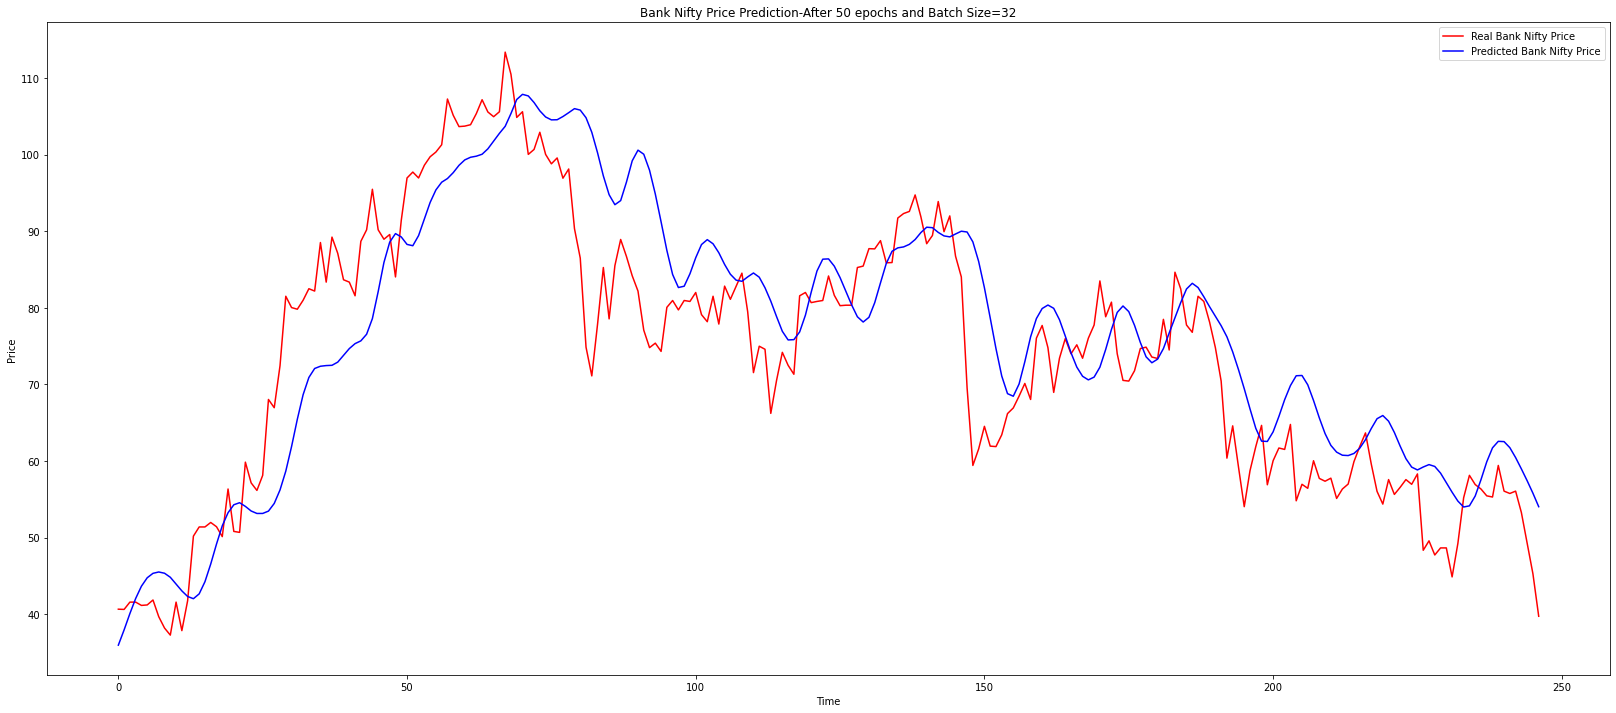

In [68]:
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Open')
plt.plot(y_pred, color = 'blue', label = 'Predicted Open')
plt.title('Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()